In [44]:
# imports 
import pandas as pd 
import matplotlib.pyplot as plt

### Importamos nuestro data frame ya preprocesado

In [45]:
data = pd.read_csv('../data/dataframe_preprocesado.csv')

In [46]:
data.shape


(12000, 26)

In [47]:
data.head(3)

,Genus_&_Specie,Time,Cranial_Capacity,Height,Location_Asia,Location_Europa,Zone_oriental,Zone_south,Zone_west,Tecno_no,...,biped_low probability,biped_modern,biped_yes,Arms_manipulate,Arms_manipulate with precision,Sexual_Dimorphism_medium-high,Sexual_Dimorphism_reduced,Vertical_Front_no,Vertical_Front_yes,Migrated_yes
0,hominino Orrorin tugenencin,6.041124,144.51410,110.24323,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,hominino Ardipithecus ramidus,4.383910,293.96021,107.69018,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Australopithecus Afarensis,3.749413,264.79849,123.76644,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Exploración de los Datos

#### Primero veamos diagramaslde dispersion respecto de las otras variables continuas

In [48]:
data.dtypes

Genus_&_Specie                     object
Time                              float64
Cranial_Capacity                  float64
Height                            float64
Location_Asia                     float64
Location_Europa                   float64
Zone_oriental                     float64
Zone_south                        float64
Zone_west                         float64
Tecno_no                          float64
Tecno_yes                         float64
Tecno_type_mode 2                 float64
Tecno_type_mode 3                 float64
Tecno_type_mode 4                 float64
Tecno_type_no                     float64
Tecno_type_primitive              float64
biped_low probability             float64
biped_modern                      float64
biped_yes                         float64
Arms_manipulate                   float64
Arms_manipulate with precision    float64
Sexual_Dimorphism_medium-high     float64
Sexual_Dimorphism_reduced         float64
Vertical_Front_no                 

#### Necesitamos convertir a numeros para nuestra regresion, dado que tenemos muchas especies unicas utilizaremos LabelEncoder que nos asignara un numero unico a cada especie

In [49]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar la codificación de etiquetas a la columna 'Genus_&_Specie'
data['Genus_&_Specie_encoded'] = label_encoder.fit_transform(data['Genus_&_Specie'])

# Mostrar las asignaciones de las etiquetas
print("Asignaciones de etiquetas:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")

Asignaciones de etiquetas:
Australopithecus Afarensis: 0
Australopithecus Africanus: 1
Australopithecus Anamensis: 2
Australopithecus Bahrelghazali: 3
Australopithecus Garhi: 4
Australopithecus Sediba: 5
Homo Antecesor: 6
Homo Erectus: 7
Homo Ergaster: 8
Homo Floresiensis: 9
Homo Georgicus: 10
Homo Habilis: 11
Homo Heidelbergensis: 12
Homo Naledi: 13
Homo Neanderthalensis: 14
Homo Rodhesiensis: 15
Homo Rudolfensis: 16
Homo Sapiens: 17
Paranthropus Aethiopicus: 18
Paranthropus Boisei: 19
Paranthropus Robustus: 20
hominino Ardipithecus ramidus: 21
hominino Orrorin tugenencin: 22
hominino Sahelanthropus tchadensis: 23


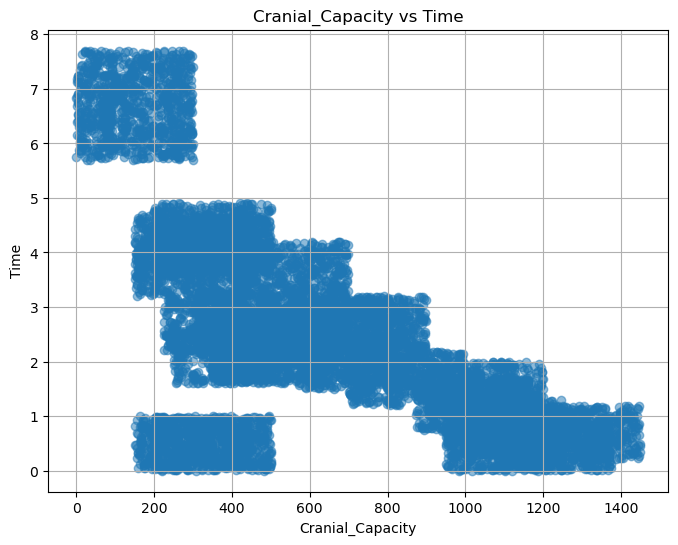

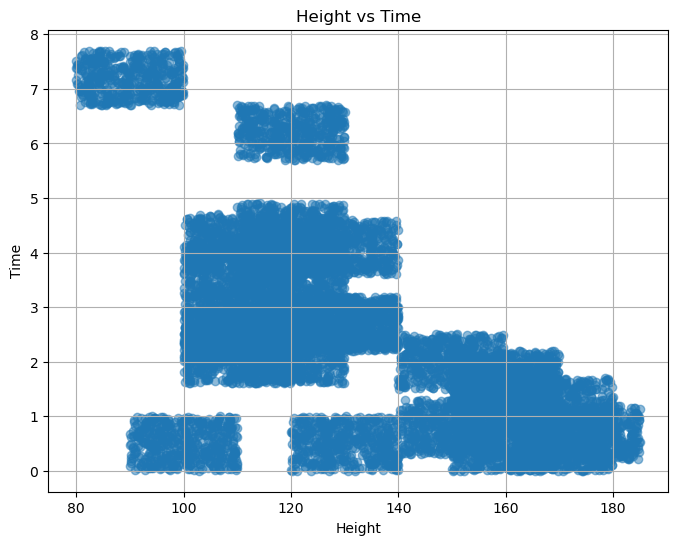

In [50]:
# Diagrama de dispersión de Cranial_Capacity vs Time
plt.figure(figsize=(8, 6))
plt.scatter(data['Cranial_Capacity'], data['Time'], alpha=0.5)
plt.title('Cranial_Capacity vs Time')
plt.xlabel('Cranial_Capacity')
plt.ylabel('Time')
plt.grid(True)
plt.show()

# Diagrama de dispersión de Height vs Time
plt.figure(figsize=(8, 6))
plt.scatter(data['Height'], data['Time'], alpha=0.5)
plt.title('Height vs Time')
plt.xlabel('Height')
plt.ylabel('Time')
plt.grid(True)
plt.show()

#### Notemos que la altura nos muestra una relación lineal más o menos clara entre la altura y el tiempo. 
#### Y  la La capacidad craneal si muestra una relación lineal muy clara

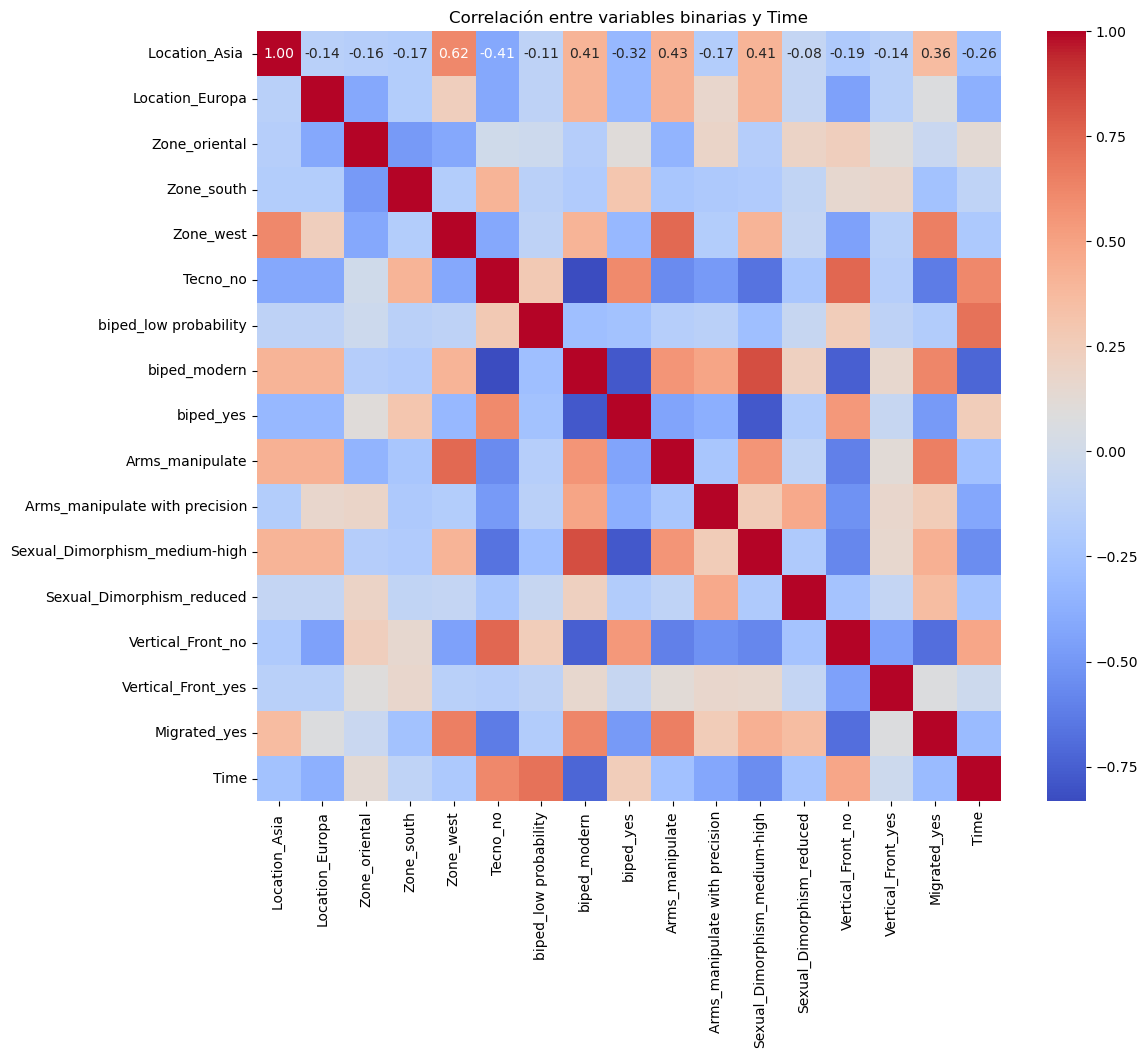

In [51]:
import seaborn as sns
# Obtener las variables categóricas binarias y la variable continua 'Time'
variables_binarias = ['Location_Asia ', 'Location_Europa', 'Zone_oriental', 'Zone_south', 'Zone_west', 'Tecno_no', 'biped_low probability', 'biped_modern', 'biped_yes', 'Arms_manipulate', 'Arms_manipulate with precision', 'Sexual_Dimorphism_medium-high', 'Sexual_Dimorphism_reduced', 'Vertical_Front_no', 'Vertical_Front_yes', 'Migrated_yes']
data_variables_binarias = data[variables_binarias]
data_time = data['Time']

# Unir las variables en un solo DataFrame
data_merged = pd.concat([data_variables_binarias, data_time], axis=1)

# Calcular la correlación
correlation_matrix = data_merged.corr()

# Visualizar la correlación en forma de mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables binarias y Time')
plt.show()

##### Miremos que tenemos algunas correlaciones positivas y otras negativas respecto al tiempo 

### Division de los datos

In [57]:
from sklearn.model_selection import train_test_split

# Definir variables predictoras y la variable objetivo
X = data.drop(columns=['Time','Genus_&_Specie'])
y = data['Time']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
X_train.shape


(8400, 25)

In [59]:
y_train.shape

(8400,)

### Usemos un modelo de bosque aleatorio para calcular importancia de las variables catetegoricas

Error cuadrático medio (MSE) del modelo de bosque aleatorio: 0.08761172631363327


/Users/rod/miniconda3/envs/crashcourse/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rod/miniconda3/envs/crashcourse/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rod/miniconda3/envs/crashcourse/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


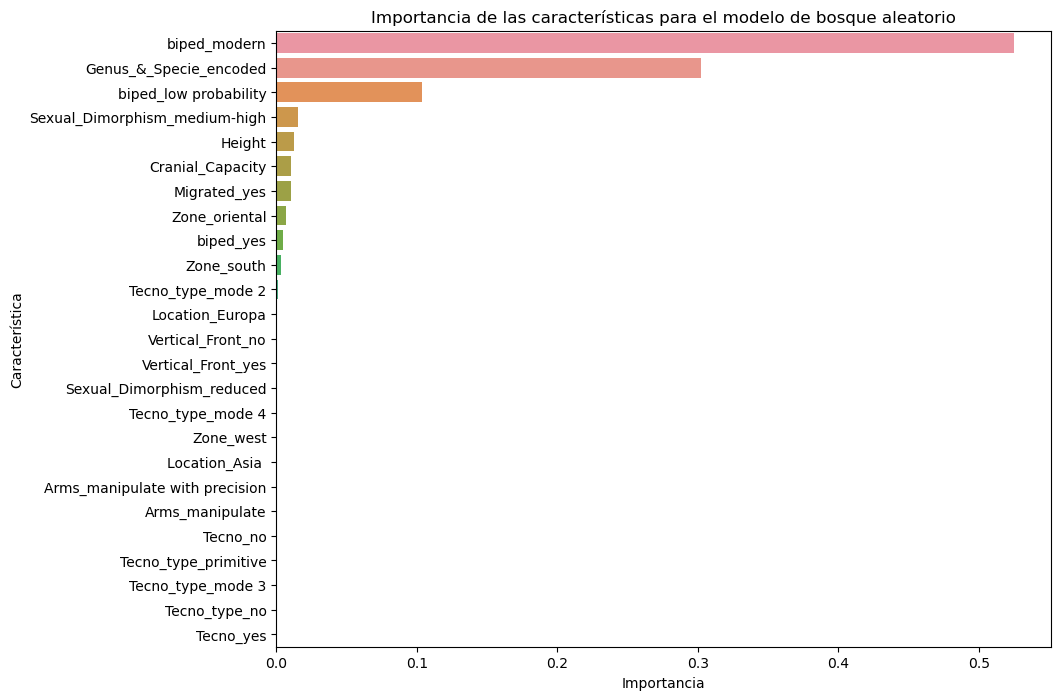

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Entrenar un modelo de bosque aleatorio con parámetros ajustados
modelo_bosque_aleatorio = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
modelo_bosque_aleatorio.fit(X_train, y_train)

# Evaluar el modelo de bosque aleatorio
y_pred_bosque_aleatorio = modelo_bosque_aleatorio.predict(X_test)
mse_bosque_aleatorio = mean_squared_error(y_test, y_pred_bosque_aleatorio)
print("Error cuadrático medio (MSE) del modelo de bosque aleatorio:", mse_bosque_aleatorio)

# Importancia de las características para el modelo de bosque aleatorio
importancias_caracteristicas = modelo_bosque_aleatorio.feature_importances_
caracteristicas = X.columns
df_importancias = pd.DataFrame({'Característica': caracteristicas, 'Importancia': importancias_caracteristicas})
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Gráfico de barras de la importancia de las características para el modelo de bosque aleatorio
plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Característica', data=df_importancias)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características para el modelo de bosque aleatorio')
plt.show()

In [66]:
df_importancias

,Característica,Importancia
15,biped_modern,5.253108e-01
24,Genus_&_Specie_encoded,3.024841e-01
14,biped_low probability,1.034147e-01
19,Sexual_Dimorphism_medium-high,1.561181e-02
1,Height,1.245100e-02
0,Cranial_Capacity,1.031637e-02
23,Migrated_yes,1.029433e-02
4,Zone_oriental,7.140303e-03
16,biped_yes,5.007513e-03
5,Zone_south,3.538788e-03


### Nos quedaremos solo con las variables que el modelo arrojo como de ikmportancia

In [67]:
# Lista de características importantes
caracteristicas_importantes = ['biped_modern', 'Genus_&_Specie_encoded', 'biped_low probability', 'Sexual_Dimorphism_medium-high', 'Height', 'Cranial_Capacity', 'Migrated_yes', 'Zone_oriental', 'biped_yes', 'Zone_south']

# Filtrar el conjunto de datos para incluir solo las características importantes
data_filtrado = data[caracteristicas_importantes]

### Ahora dividimos nuestros datos para entrenar nuestro modelo de regression 

In [ ]:
# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = data_filtrado
y = data['Time']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Construcción y evaluación de modelos de regresion